## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.   

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df_len = len(df)
df_len

294478

c. The number of unique users in the dataset.

In [5]:
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [6]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
treatment_old_count = df.query('group == "treatment" & landing_page == "old_page"').shape[0]
control_new_count = df.query('group == "control" & landing_page == "new_page"').shape[0]

mismatch_count = treatment_old_count + control_new_count
mismatch_count

3893

In [8]:
treatment_old = df.query('group == "treatment" & landing_page == "old_page"')
control_new = df.query('group == "control" & landing_page == "new_page"')

mismatch = control_new.append(treatment_old)
mismatch.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1


f. Do any of the rows have missing values?

In [9]:
df.isnull().values.any() #No Null

#Interested in viewing the dataset more 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
#creating a new identical dataframe
df2 = df
df2 = df2.drop(mismatch.index)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
unique_id = df2['user_id'].count()
print(f"Total Number of Unique ID: {unique_id}")

Total Number of Unique ID: 290585


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop(labels = 1899, axis = 0 , inplace = True)
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
convert_prob = df2['converted'].mean()
print(f"The probability of an individual converting regardless of the page they receive is: {convert_prob}")

The probability of an individual converting regardless of the page they receive is: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
convert_control = df2[df2['group']== 'control']['converted'].mean()
print(f"Probability of control group converting: {convert_control}")

Probability of control group converting: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
convert_treatment = df2[df2['group']== 'treatment']['converted'].mean()
print(f"Probability of treatment group converting: {convert_treatment}")

Probability of treatment group converting: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [19]:
newp_prob = df2['landing_page'].value_counts()[0]/len(df2)
print(f"Probability of an individual receving a new page is: {newp_prob}")

Probability of an individual receving a new page is: 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No, it doesn't seem like there is sufficient evidence to suggest that the new treatment page leads to more conversion. Although the data shows that the new page has lead to a slightly lower conversion rate, the difference is so small that it can be ignored.** 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, I could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

**For now, I want to assume that old page is better, meaning that the old page generates more conversions. We will assume a Type 1 Error of 0.05.**


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis: Our Null Hypothesis is that the difference between the conversion rates will be less than or equal to 0, meaning that the old page generates more conversions.** 

$$H_0: p_{new} - p_{old} \leq 0$$

**Alternative Hypothesis:Our Null Hypothesis is that the difference between the conversion rates will be greater than 0, meaning that the new page generates more conversions.**

$$H_1: p_{new} - p_{old} > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>
Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>
Use the cells below to provide the necessary parts of this simulation.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
# p_new = p_old = overall conversion rate 
p_new_null = df2['converted'].mean()
p_mean = p_new_null
print(f"Probabilty of converting for new page under null is {p_mean}")

Probabilty of converting for new page under null is 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
#p_mean = p_new = p_old = overall conversion rate 
p_mean
print(f"Probabilty of converting for old page under null is {p_mean}")

Probabilty of converting for old page under null is 0.11959708724499628


c. What is $n_{new}$?

In [22]:
n_new = df2.query("landing_page == 'new_page'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [23]:
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
# Use random.binomial(n, p, size)

new_page_converted = np.random.binomial(1, p_mean, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
# Use random.binomial(n, p, size)

old_page_converted = np.random.binomial(1, p_mean, n_old)
old_page_converted

array([0, 0, 1, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
#Get the mean of both first then subtract
new_page_converted.mean() - old_page_converted.mean()

-0.0004910823985707496

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []

#Run simulation 10000 times
new_convert_simulate = np.random.binomial(n_new, p_mean, 10000)/n_new
old_convert_simulate = np.random.binomial(n_old, p_mean, 10000)/n_old
p_diffs = new_convert_simulate - old_convert_simulate

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

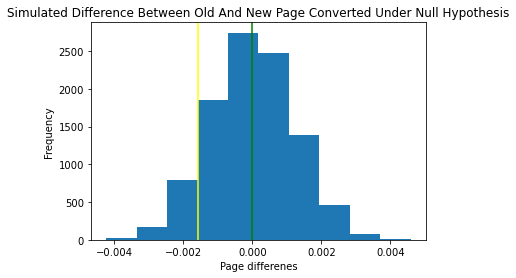

In [28]:
#Use convert_treatment and convert_control from previous problems to get obs_diff(real difference)
obs_diff = convert_treatment - convert_control 


plt.hist(p_diffs)
plt.title("Simulated Difference Between Old And New Page Converted Under Null Hypothesis")
plt.xlabel('Page differenes')
plt.ylabel("Frequency")
plt.axvline(p_diffs.mean(), color = 'green', label = "Simulated Difference")
plt.axvline(obs_diff, color = 'yellow', label = "Observed Difference")

**The simulation created a normal distribution as expected. It seems like the mean of this normal distribution is 0 which is what the data should look like under the null hypothesis.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# Remember that out null is pretty much 0 or less, so null value isn't needed here
print(f"Our observed difference is: {obs_diff}")
print(f"The proportion of p_diffs greater than observed (p-value): {((p_diffs > obs_diff).mean())}")

Our observed difference is: -0.0015782389853555567
The proportion of p_diffs greater than observed (p-value): 0.9007


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This is called the p-value, the measurement of the probability of observing a statistics. Since the p-value is greater than the Type 1 Error of 0.05, we fail to reject the null hypothesis. There is strong evidence for the null hypothesis. This means that the treatment page does not have higher conversion rates than the control page on a statistically significant basis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page'")['converted'].sum()
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
# stats.proportions_ztest(count, nobs), use array for each independent sample (old and new)
# z-score is the number of STD away from mean for a certain data point
z_score, p_val = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new], alternative = 'smaller')
z_score, p_val

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score refers to the difference between our test statistics; in our case it's the difference between the conversion rates. After running the test, we find that our null hypothesis is 1.31 standard deviations above the mean, while the p-value is 0.1899 which is above our alpha threshold of 0.05. After computing the z-score and p-value, we can suggests that the conversion rates for the old an dnew pages are not statistically different from one another. Thus, giving us a reason not to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since we're looking for conversions which are binary variables, we should use logistic regression to perform thos case.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
#Create a new copy in case
df3 = df2
df3['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df3['ab_page']

0         0
1         0
2         1
3         1
4         0
         ..
294473    0
294474    0
294475    0
294476    0
294477    1
Name: ab_page, Length: 290584, dtype: uint8

In [33]:
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
import statsmodels.api as sm
df3['intercept'] = 1
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Nov 2021   Pseudo R-squ.:               8.077e-06
Time:                        16:53:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Null Hypothesis: Our Null Hypothesis is that the difference between the conversion rates will be equal to 0, meaning that the old page generates more conversions.** 

$$H_0: p_{new} - p_{old} = 0$$

**Alternative Hypothesis:Our Null Hypothesis is that the difference between the conversion rates will be not be equal to 0, meaning that the new page generates more conversions.**

$$H_1: p_{new} - p_{old} \neq 0$$


**Keep in mind that this is a two-sided t-test commpared to the one-sided t-test in part 2.**

**The p-value associated with ab_page is 0.190 which is basically the same as the previous example of 0.1899, if we decide to round it up. This model attempts to predict whether or not a user will convert, depending on the page received. However, it should be noted that the slightly higher p-value obtained in part 3 is due to the addition of the intercept which is meant to account for the bias and make the value more accurate. In other words,making it closer to the true p-value. From this test, we can conclude that the p-value is still to high to reject the null hypothesis.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In general, there may be some disadvantages to adding too many features. For this partculair analysis(regression or categorization), we want features that have large impacts on outcomes. Small impacts are not influential and be taken care of by the intercept. Luckily, there was only one feature added to determine our users' conversion rates, so a couple more features wouldn't hurt. After all, there are other factors that might predit conversions, such as time spent on page or the country they reside in. We should keep in mind and make sure that the factors are not colinear.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [39]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [41]:
### Create the necessary dummy variables
df_new[['US', 'UK', 'CA']] = pd.get_dummies(df_new['country'])

In [42]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [43]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1

#Use CA as baseline
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'UK', 'US']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 27 Nov 2021   Pseudo R-squ.:               2.323e-05
Time:                        16:54:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
#Create interactions variable between country and page
df_new['ab_US'] = df_new['ab_page']*df_new['US']
df_new['ab_UK'] = df_new['ab_page']*df_new['UK']

In [45]:
#New Regression Model and Fit it
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','ab_UK','ab_US', 'UK', 'US']])
results = logit_mod.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 27 Nov 2021   Pseudo R-squ.:               3.482e-05
Time:                        16:55:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
ab_US         -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
US            -0.0175      0.038     -0.465      0.642      -0.091       0.056
==============================================================================
"""

**Again, it seems like our p-values are still too big and above the threshold of 0.05 , so we fail to reject the null hypothesis. It seems like the intereactions between page and country have no impact on conversions.**

<a id='conclusions'></a>
## Conclusions

**Although, at the start, there a small difference between the conversion rates of the old and new pages, there isn't enough evidence to fully reject teh null hypothesis. As a matter of fact, the histogram shows the observed difference under the null hypothesis, which indicates that the new page performs slightly worse than the old page.However, after further tests, we find that we have little reason to reject the null hypothesis.**

**In part 3, we found that the country is not statistically significant, meaning that the result isn't dependent on the country. This is because the p-values calculated are too big to reject the null hypothesis, based on the Type 1 Error of 0.05. We also ran another failed test that tests if interactions have any impact on conversions. Furthermore, we have a large enough sample size and we know that there is a 50% chance overall that someone will receive the new webpage.** 

**Based on this research, I would recommend that the company improve their old webpage, rather than implmenting the new one.**